In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
oil = pd.read_csv("HINDPETRO.NS.csv")
oil

Date        Open        High         Low       Close   Adj Close  \
0     2002-02-20   55.311111   56.177776   54.000000   54.466667   19.928545   
1     2002-02-21   54.666664   55.522221   53.222221   53.444443   19.554525   
2     2002-02-22   53.666664   55.888889   53.333332   55.177776   20.188725   
3     2002-02-25   54.666664   58.000000   54.666664   57.500000   21.038395   
4     2002-02-26   57.788887   63.255554   57.788887   62.977776   23.042627   
...          ...         ...         ...         ...         ...         ...   
5472  2024-02-13  503.000000  507.750000  492.399994  501.649994  501.649994   
5473  2024-02-14  495.000000  549.000000  491.549988  543.299988  543.299988   
5474  2024-02-15  548.799988  579.700012  537.549988  575.000000  575.000000   
5475  2024-02-16  578.000000  594.799988  558.849976  565.700012  565.700012   
5476  2024-02-19  567.000000  569.599976  552.549988  554.700012  554.700012   

          Volume  
0      5523997.0  
1      4332906.0  
2      5159889.0  
3      8563153.0  
4     20768503.0  
...          ...  
5472   5094484.0  
5473  14135751.0  
5474  17700107.0  
5475  14846350.0  
5476  10134836.0  

[5477 rows x 7 columns]

<AxesSubplot:>

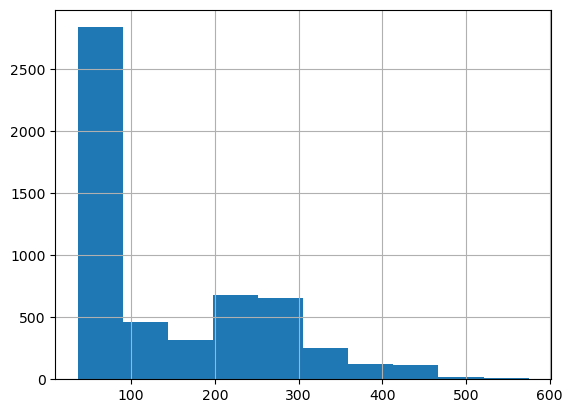

In [3]:
# Data Visualization HistoGram

oil["Close"].hist()

In [4]:
# Data Visualization-- Plotting for Close Column

oil_1 = px.data.stocks()
fig = px.line(oil_1, x=oil.index, y=oil["Close"])
fig.update_layout(xaxis_title="Data",  # Set x-axis title
                  yaxis_title="Closing Price"  # Set y-axis title
                 )

fig.show()

## EDA 

In EDA part data Cleaning, Data Transformation, Outliers Detection, Finding Duplicated Values, and Checking for NAN Values and missing Values, Feature Scaling

In [5]:
# 1.Information of Dataset using Info()

oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5477 non-null   object 
 1   Open       5467 non-null   float64
 2   High       5467 non-null   float64
 3   Low        5467 non-null   float64
 4   Close      5467 non-null   float64
 5   Adj Close  5467 non-null   float64
 6   Volume     5467 non-null   float64
dtypes: float64(6), object(1)
memory usage: 299.6+ KB


In [6]:
# 2.Checking for dulpications

oil.nunique()

Date         5477
Open         3265
High         3749
Low          3813
Close        4260
Adj Close    5195
Volume       5429
dtype: int64

In [7]:
# 3.Descriptive Analysis of Dataset Oil like Mean,Standard Deivation, Counts 

oil.describe().T

count          mean           std        min           25%  \
Open       5467.0  1.511522e+02  1.078214e+02  36.566666  6.688889e+01   
High       5467.0  1.536971e+02  1.094891e+02  37.611111  6.800000e+01   
Low        5467.0  1.484003e+02  1.059454e+02  35.111111  6.577778e+01   
Close      5467.0  1.509156e+02  1.077371e+02  36.244446  6.678333e+01   
Adj Close  5467.0  1.041957e+02  9.499206e+01  14.257576  3.052095e+01   
Volume     5467.0  5.952961e+06  5.786071e+06   0.000000  2.816246e+06   

                    50%           75%           max  
Open       8.700000e+01  2.388250e+02  5.780000e+02  
High       8.844444e+01  2.424000e+02  5.948000e+02  
Low        8.541111e+01  2.345250e+02  5.588500e+02  
Close      8.667778e+01  2.385000e+02  5.750000e+02  
Adj Close  4.279884e+01  1.847916e+02  5.750000e+02  
Volume     4.520943e+06  7.311249e+06  8.875862e+07

In [8]:
# 4.Checking missing value

oil.isnull().sum()

Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [9]:
# 5.Checking for NAN Values in Dataset in Column Wise

oil_nan = oil.isna().any(axis=1)

In [10]:
# Printing the Nan Values

oil_df = oil[oil_nan]
oil_df

Date  Open  High  Low  Close  Adj Close  Volume
298   2003-04-14   NaN   NaN  NaN    NaN        NaN     NaN
568   2004-04-26   NaN   NaN  NaN    NaN        NaN     NaN
690   2004-10-13   NaN   NaN  NaN    NaN        NaN     NaN
2006  2010-02-06   NaN   NaN  NaN    NaN        NaN     NaN
2484  2012-01-07   NaN   NaN  NaN    NaN        NaN     NaN
2523  2012-03-03   NaN   NaN  NaN    NaN        NaN     NaN
2653  2012-09-08   NaN   NaN  NaN    NaN        NaN     NaN
2695  2012-11-11   NaN   NaN  NaN    NaN        NaN     NaN
3032  2014-03-22   NaN   NaN  NaN    NaN        NaN     NaN
3261  2015-02-28   NaN   NaN  NaN    NaN        NaN     NaN

In [11]:
# Remove rows with NaN values

oil_cleaned = oil.dropna()

In [12]:
oil_cleaned

Date        Open        High         Low       Close   Adj Close  \
0     2002-02-20   55.311111   56.177776   54.000000   54.466667   19.928545   
1     2002-02-21   54.666664   55.522221   53.222221   53.444443   19.554525   
2     2002-02-22   53.666664   55.888889   53.333332   55.177776   20.188725   
3     2002-02-25   54.666664   58.000000   54.666664   57.500000   21.038395   
4     2002-02-26   57.788887   63.255554   57.788887   62.977776   23.042627   
...          ...         ...         ...         ...         ...         ...   
5472  2024-02-13  503.000000  507.750000  492.399994  501.649994  501.649994   
5473  2024-02-14  495.000000  549.000000  491.549988  543.299988  543.299988   
5474  2024-02-15  548.799988  579.700012  537.549988  575.000000  575.000000   
5475  2024-02-16  578.000000  594.799988  558.849976  565.700012  565.700012   
5476  2024-02-19  567.000000  569.599976  552.549988  554.700012  554.700012   

          Volume  
0      5523997.0  
1      4332906.0  
2      5159889.0  
3      8563153.0  
4     20768503.0  
...          ...  
5472   5094484.0  
5473  14135751.0  
5474  17700107.0  
5475  14846350.0  
5476  10134836.0  

[5467 rows x 7 columns]

In [13]:
# 6.Correlation Between Features

oil_cleaned.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999586  0.999594  0.999237   0.968064 -0.011371
High       0.999586  1.000000  0.999464  0.999708   0.968690 -0.002707
Low        0.999594  0.999464  1.000000  0.999619   0.968600 -0.015872
Close      0.999237  0.999708  0.999619  1.000000   0.968929 -0.007822
Adj Close  0.968064  0.968690  0.968600  0.968929   1.000000 -0.020997
Volume    -0.011371 -0.002707 -0.015872 -0.007822  -0.020997  1.000000

<AxesSubplot:>

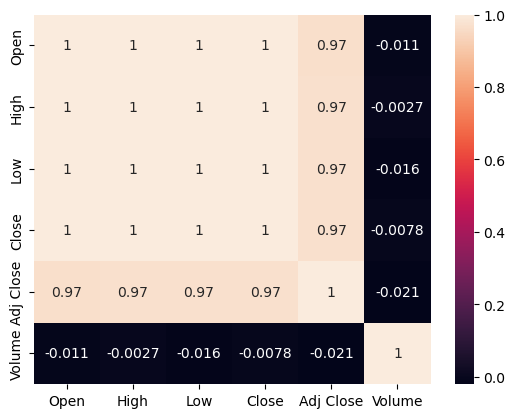

In [14]:
# 6.1.Plotting HeatMap For Correlation 

sns.heatmap(oil_cleaned.corr(), annot=True)

In [15]:
# 7.Checking for Duplicated for All Rows

oil_cleaned.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5472    False
5473    False
5474    False
5475    False
5476    False
Length: 5467, dtype: bool

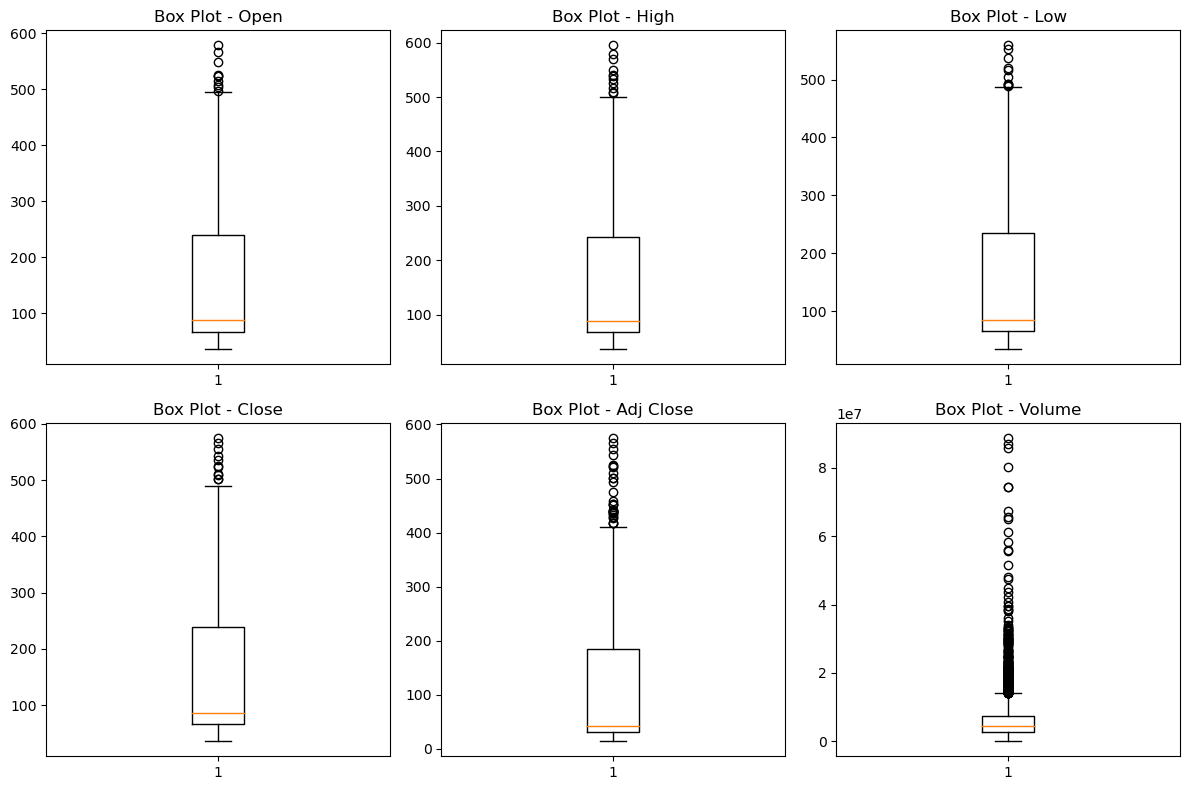

In [16]:
# 8. Finding Outliers for all the features

# Create a box plot for each variable
plt.figure(figsize=(12, 8))

# Box plot for Open
plt.subplot(2, 3, 1)
plt.boxplot(oil_cleaned['Open'])
plt.title('Box Plot - Open')

# Box plot for High
plt.subplot(2, 3, 2)
plt.boxplot(oil_cleaned['High'])
plt.title('Box Plot - High')

# Box plot for Low
plt.subplot(2, 3, 3)
plt.boxplot(oil_cleaned['Low'])
plt.title('Box Plot - Low')

# Box plot for Close
plt.subplot(2, 3, 4)
plt.boxplot(oil_cleaned['Close'])
plt.title('Box Plot - Close')

# Box plot for Adj Close
plt.subplot(2, 3, 5)
plt.boxplot(oil_cleaned['Adj Close'])
plt.title('Box Plot - Adj Close')

# Box plot for Volume
plt.subplot(2, 3, 6)
plt.boxplot(oil_cleaned['Volume'])
plt.title('Box Plot - Volume')

# Adjust layout for better spacing
plt.tight_layout()

# Show the box plots
plt.show()

In [17]:
# Dropping the Columns of "Apple" Dataset.

columns_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df = oil_cleaned.drop(columns=columns_to_drop)
df.head()

Date      Close
0  2002-02-20  54.466667
1  2002-02-21  53.444443
2  2002-02-22  55.177776
3  2002-02-25  57.500000
4  2002-02-26  62.977776

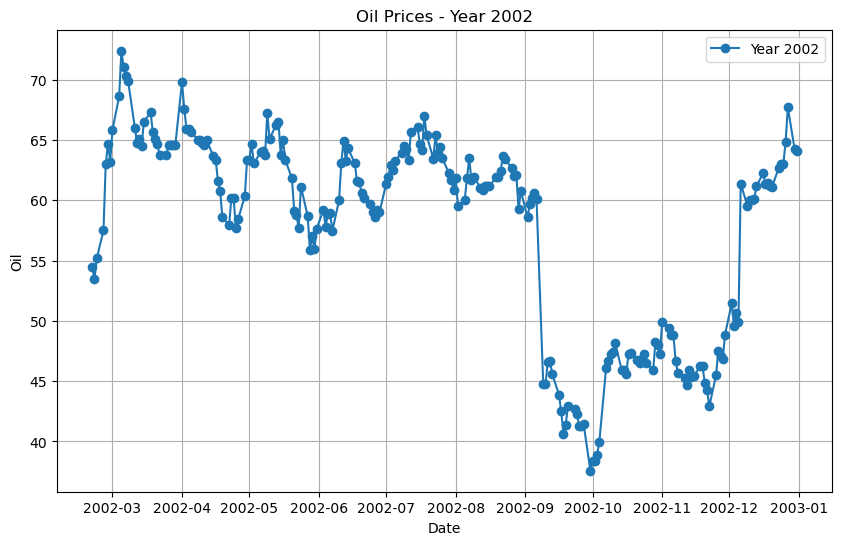

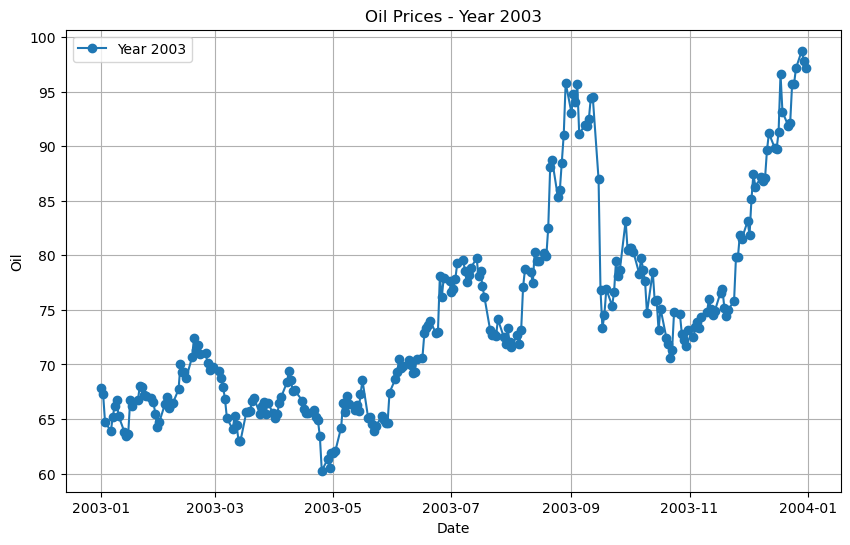

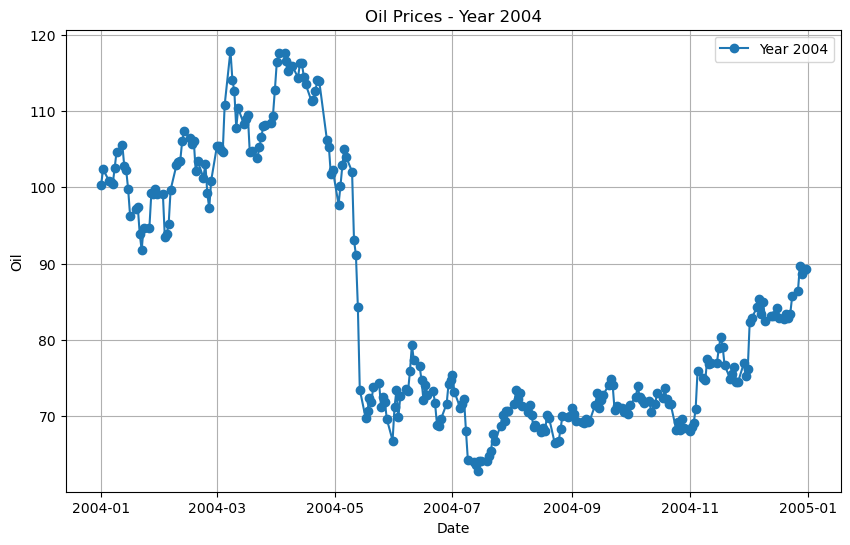

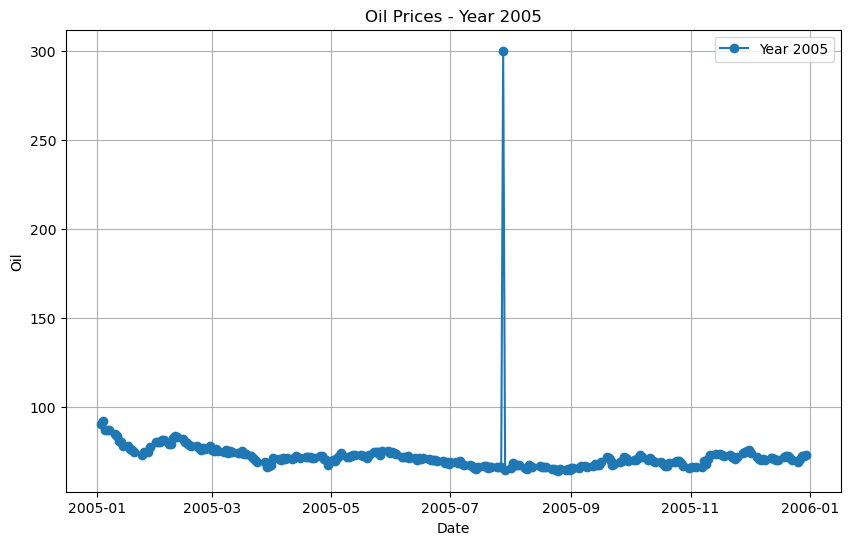

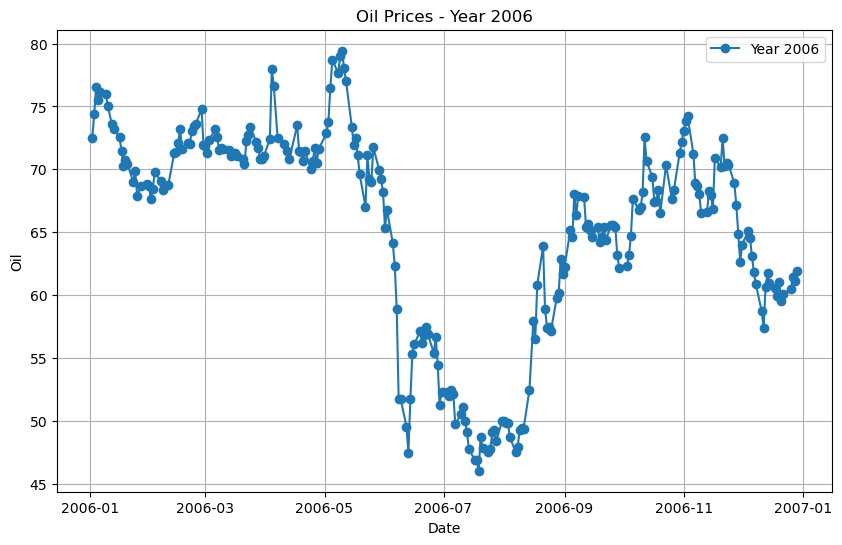

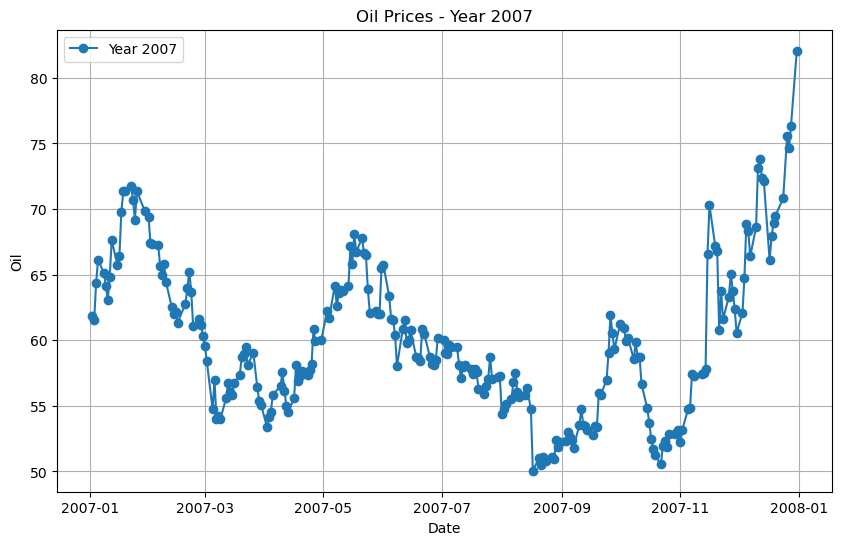

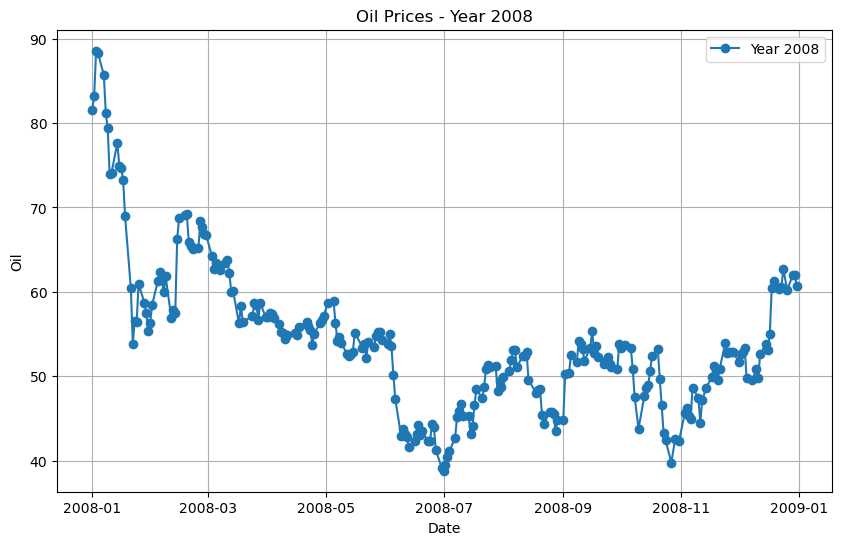

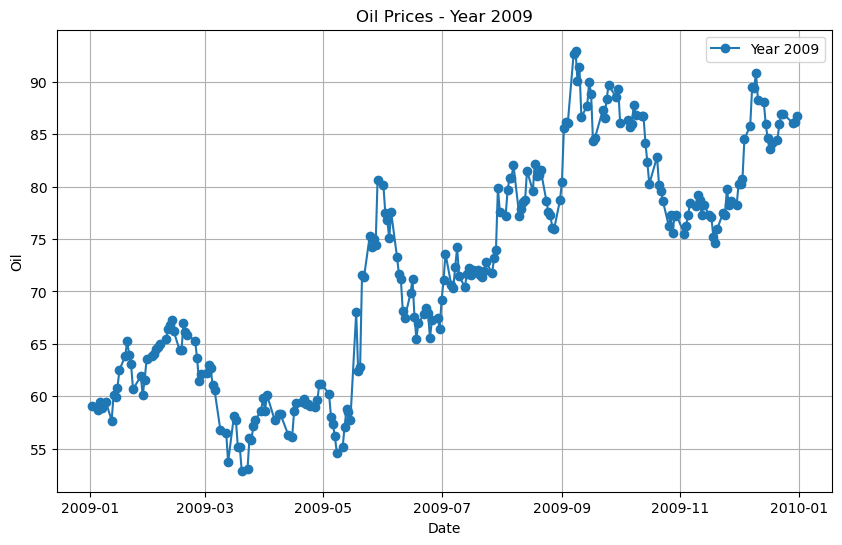

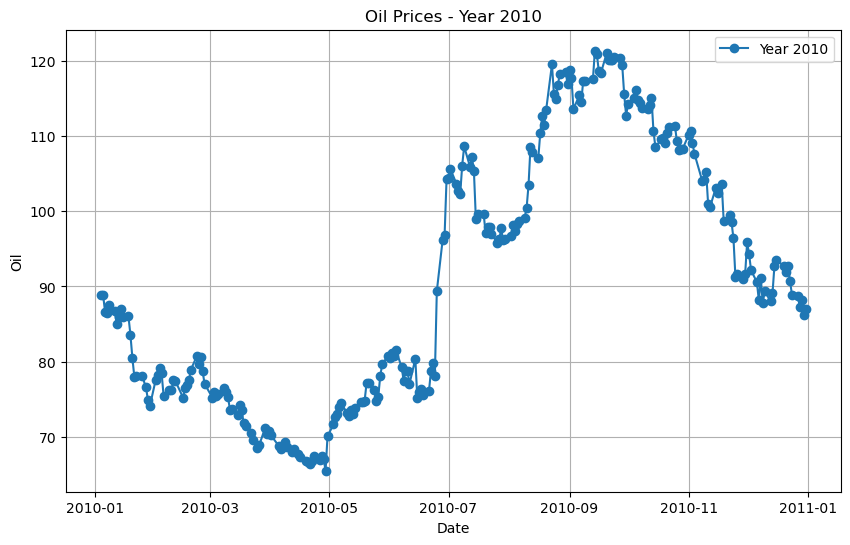

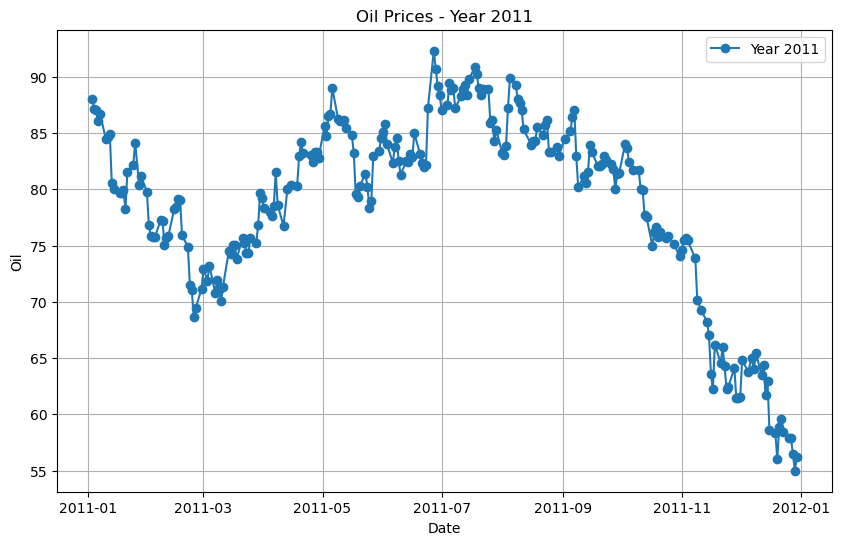

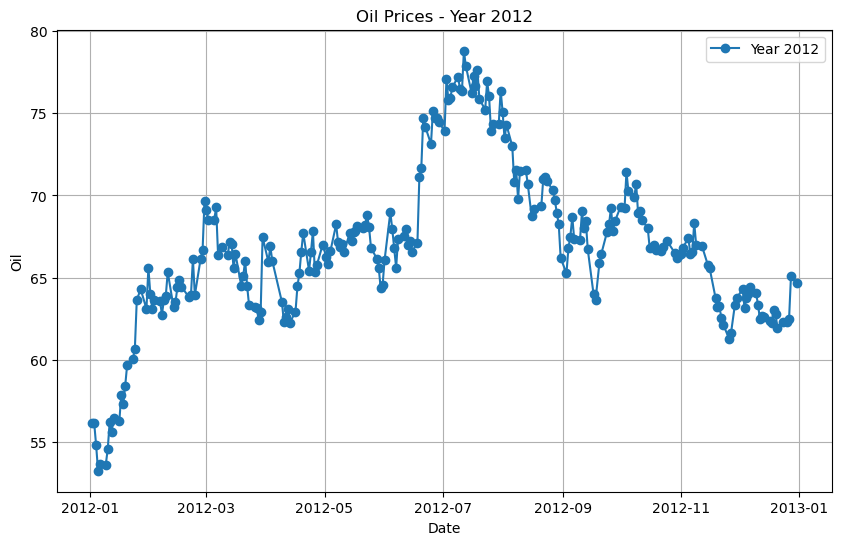

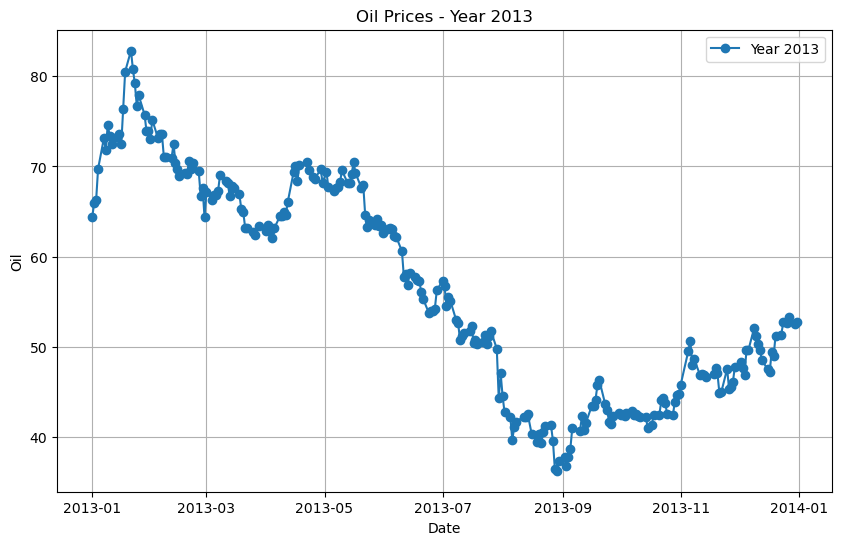

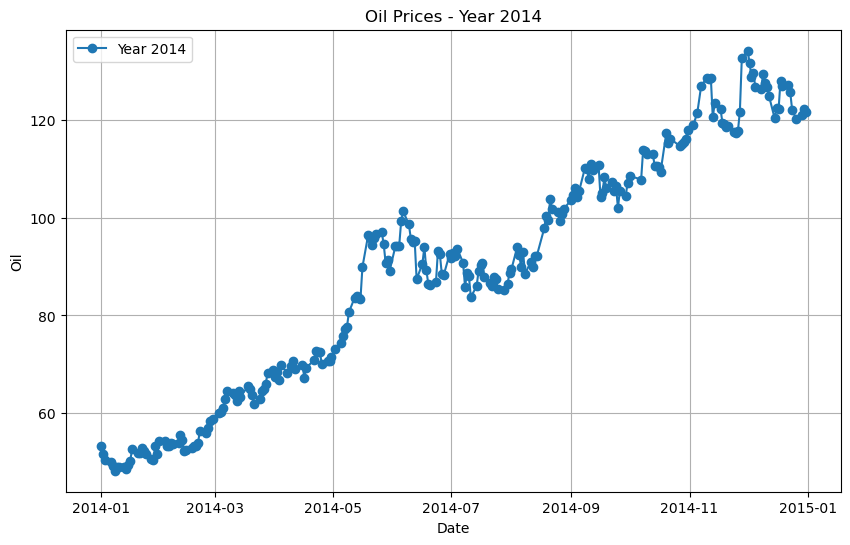

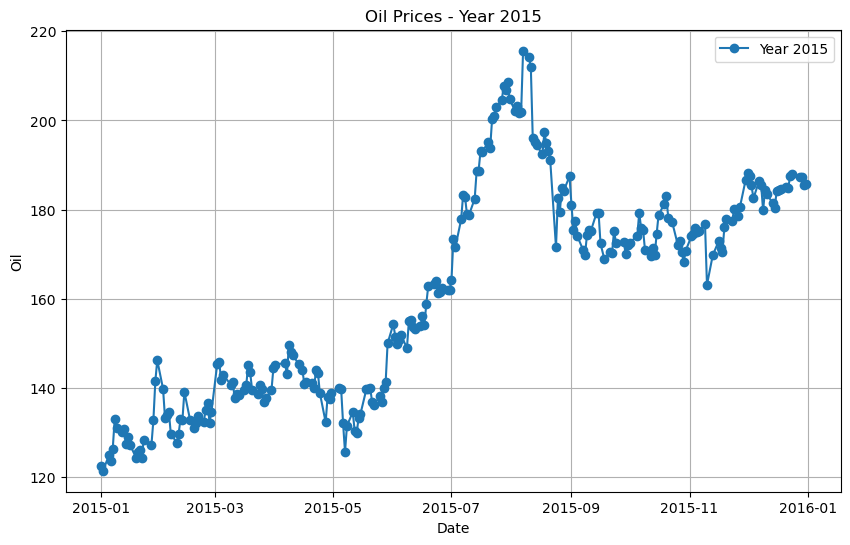

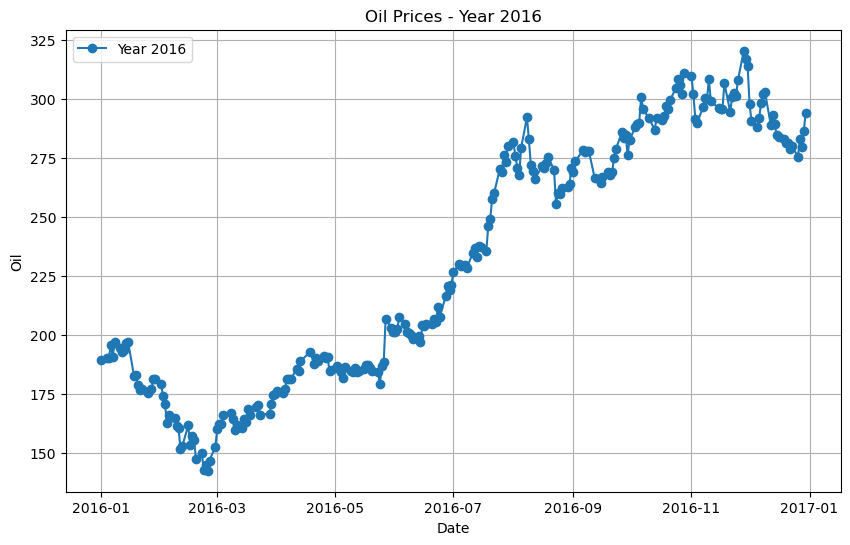

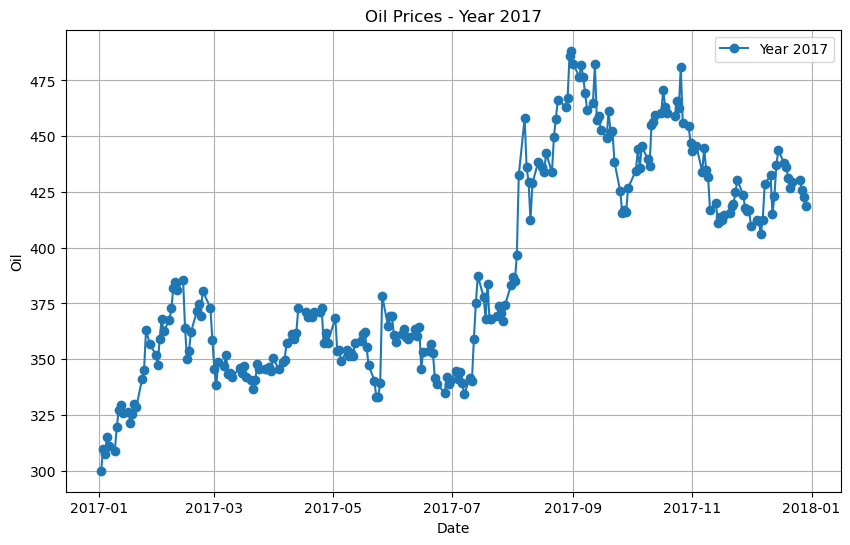

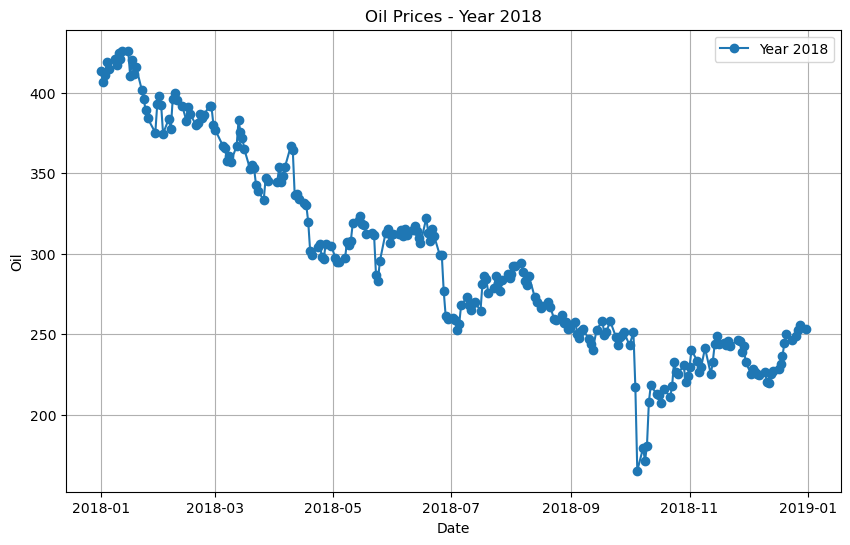

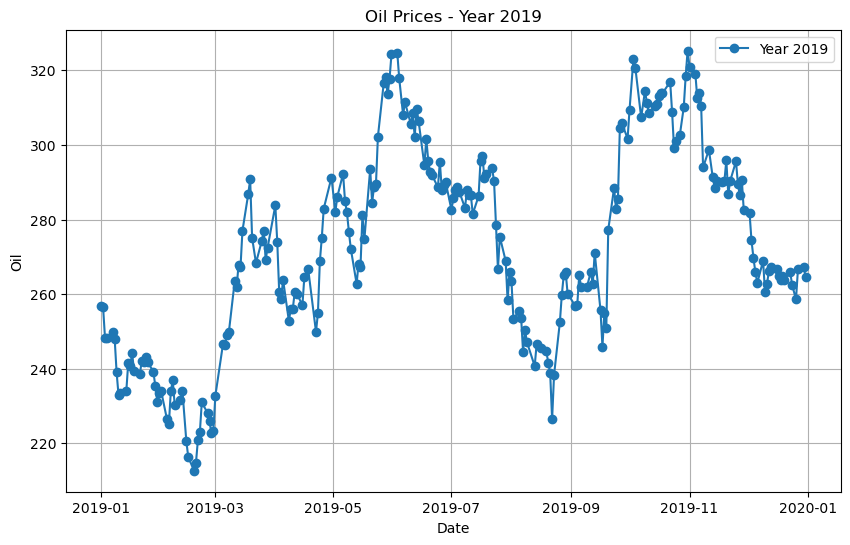

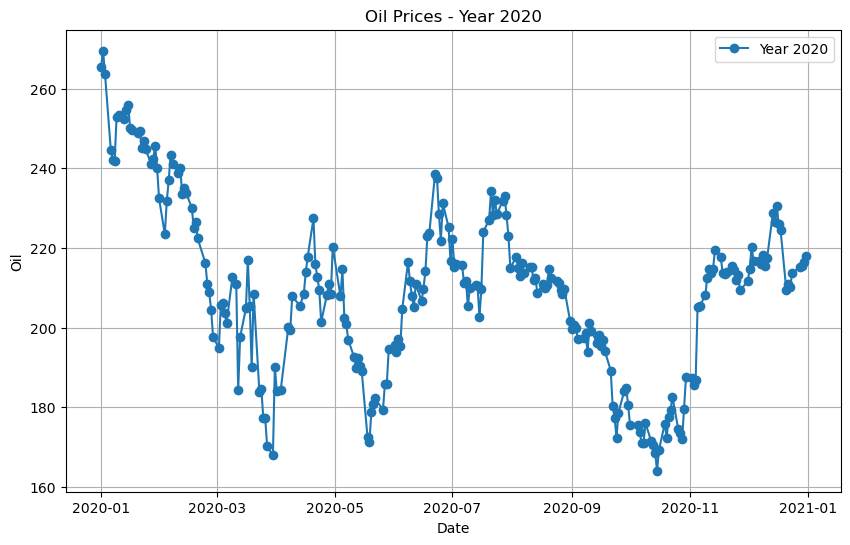

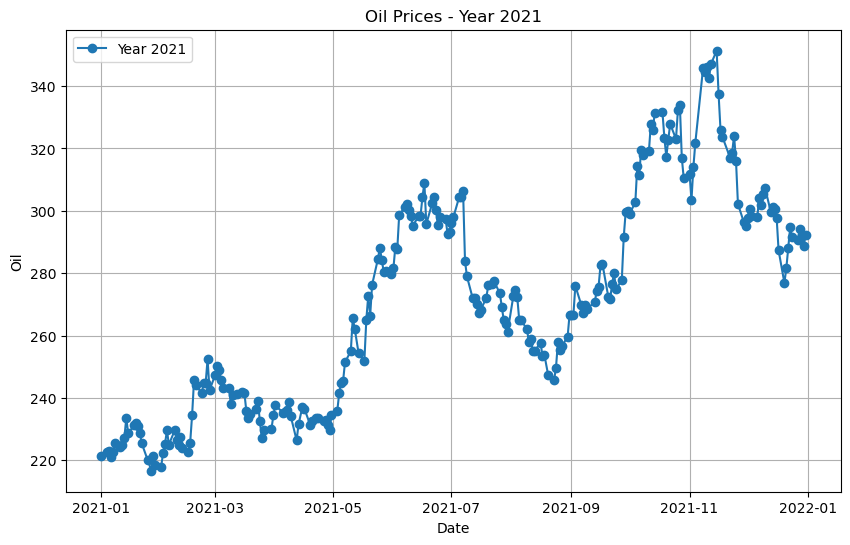

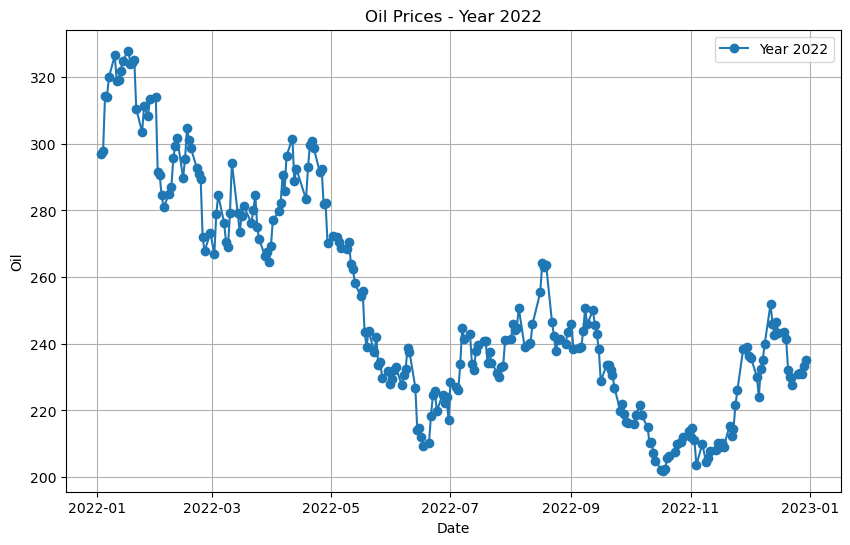

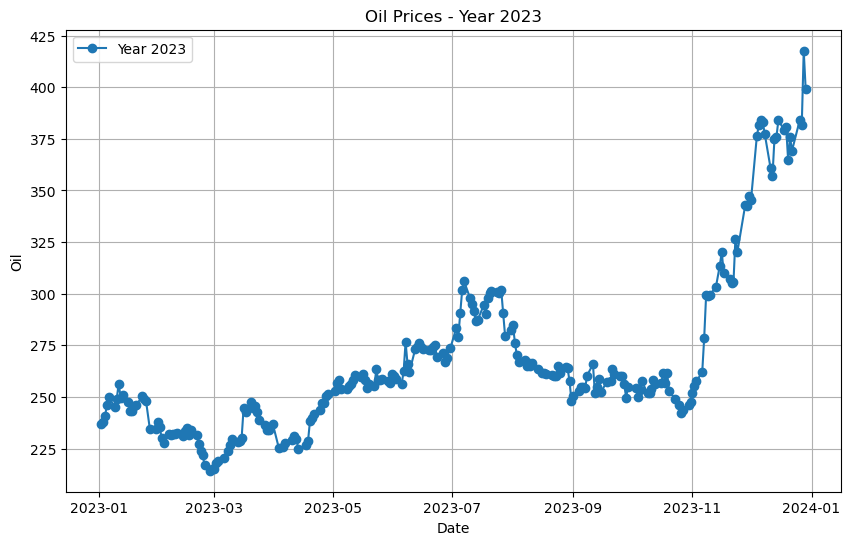

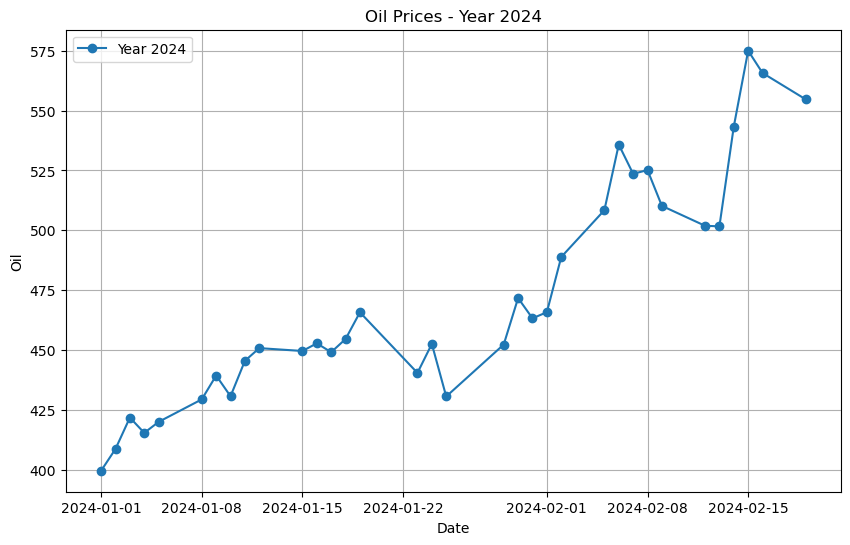

In [18]:
# Plotting of Monthly Graph of Close Column

# Load your stock data
# Assuming your DataFrame is named 'df' and has the columns 'Date' and 'Close'
# If your 'Date' column is not in datetime format, convert it
oil_cleaned['Date'] = pd.to_datetime(oil_cleaned['Date'])

# Extract the year from the 'Date' column
oil_cleaned['Year'] = oil_cleaned['Date'].dt.year

# Group by year and calculate the mean of 'Close' for each year
df_yearly = oil_cleaned.groupby('Year')['Close'].mean().reset_index()

# Plot a separate graph for each year
for year in df_yearly['Year']:
    plt.figure(figsize=(10, 6))

    # Filter data for the current year
    data_year = oil_cleaned[oil_cleaned['Year'] == year]

    # Plot the data for the current year
    plt.plot(data_year['Date'], data_year['Close'], marker='o', linestyle='-', label=f'Year {year}')

    plt.title(f'Oil Prices - Year {year}')
    plt.xlabel('Date')
    plt.ylabel('Oil')
    plt.legend()
    plt.grid(True)

    
    plt.show()

In [19]:
# Weekly Plotting of Graph

# Here, the Plotting of the dataset Like "Day Wise", "Month Wise","Yearly Wise" and "WeekDay Wise"

# Spliting the date into Day, Months and Years
# Date-based Feature
oil_cleaned['Date'] = pd.to_datetime(oil_cleaned['Date'])
oil_cleaned['Year'] = oil_cleaned['Date'].dt.year
oil_cleaned['Month'] = oil_cleaned['Date'].dt.month
oil_cleaned['Day'] = oil_cleaned['Date'].dt.day
oil_cleaned['Weekday'] = oil_cleaned['Date'].dt.weekday  # Monday is 0, Sunday is 6

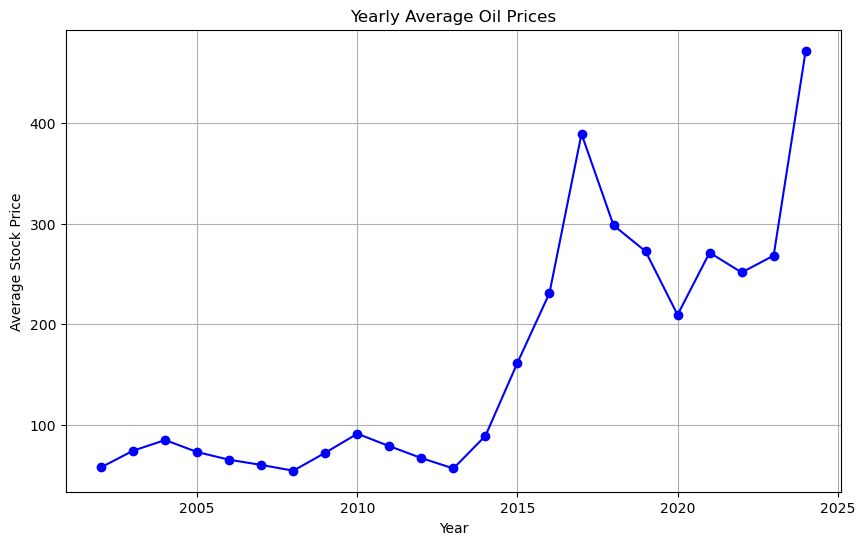

In [20]:
oil_cleaned['Date'] = pd.to_datetime(oil_cleaned['Date'])


# Extract the year from the 'Date' column
oil_cleaned['Year'] = oil_cleaned['Date'].dt.year

# Group by year and calculate the mean of 'Close' for each year
df_yearly = oil_cleaned.groupby('Year')['Close'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_yearly['Year'], df_yearly['Close'], marker='o', linestyle='-', color='b')
plt.title('Yearly Average Oil Prices')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')
plt.grid(True)
plt.show()

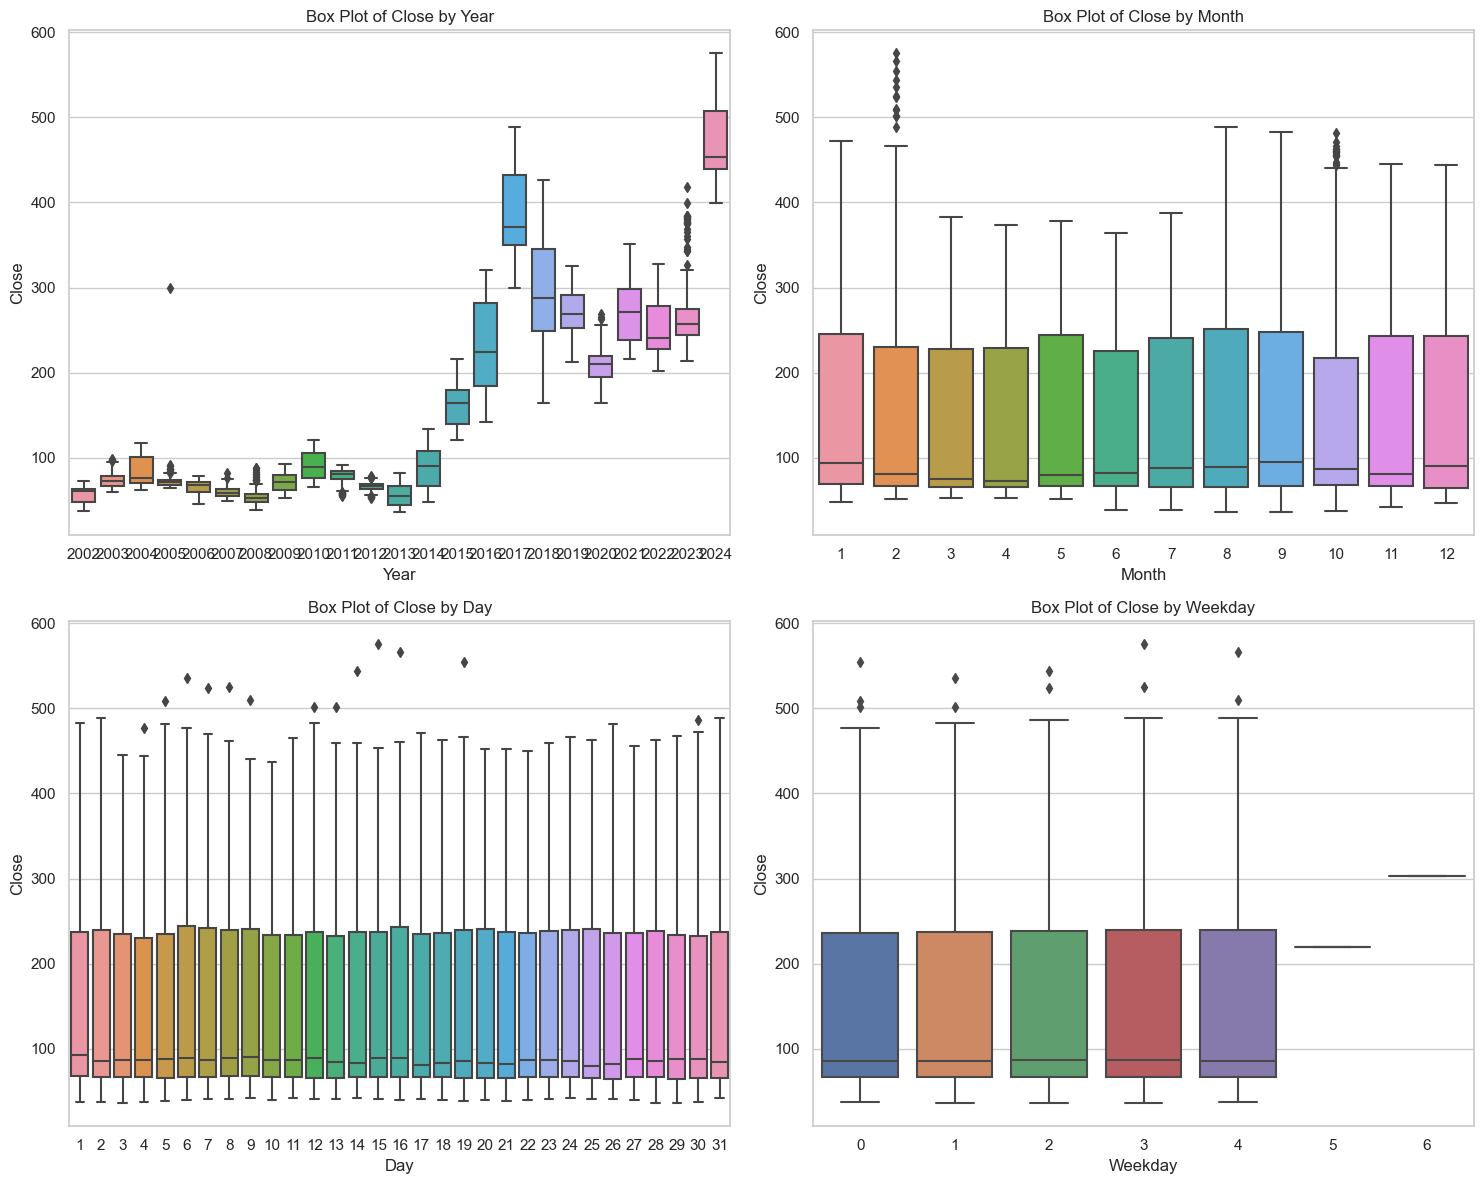

In [21]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Box plot for Year
sns.boxplot(x='Year', y='Close', data=oil_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Close by Year')

# Box plot for Month
sns.boxplot(x='Month', y='Close', data=oil_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Close by Month')

# Box plot for Day
sns.boxplot(x='Day', y='Close', data=oil_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Close by Day')

# Box plot for Weekday
sns.boxplot(x='Weekday', y='Close', data=oil_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Close by Weekday')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### ACF and PACF 

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

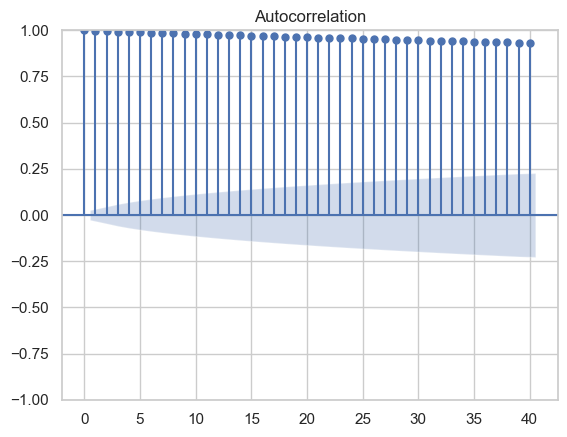

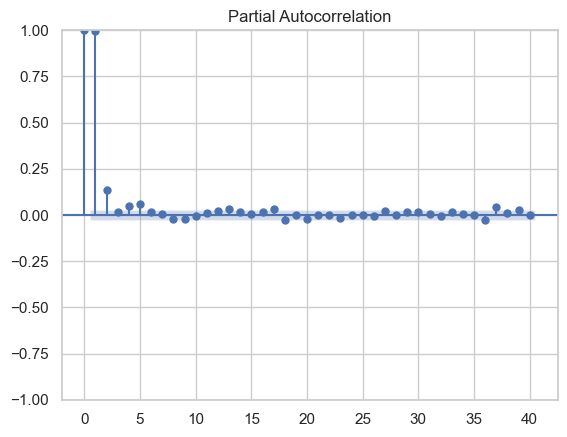

In [23]:
# Plot the ACF
plot_acf(oil_cleaned["Close"], lags=40)
title = ('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(oil_cleaned["Close"], lags=40)
title = ('Partial Autocorrelation Function (PACF)')

plt.show()

## Model Validation Techniques 

In [24]:
# Considering the df["Date"] as x feature and df["Close"] as the y(or) target Variable

df

Date       Close
0     2002-02-20   54.466667
1     2002-02-21   53.444443
2     2002-02-22   55.177776
3     2002-02-25   57.500000
4     2002-02-26   62.977776
...          ...         ...
5472  2024-02-13  501.649994
5473  2024-02-14  543.299988
5474  2024-02-15  575.000000
5475  2024-02-16  565.700012
5476  2024-02-19  554.700012

[5467 rows x 2 columns]

In [25]:
df["Date"]=df["Date"].astype('datetime64')

x = df["Date"]
x

0      2002-02-20
1      2002-02-21
2      2002-02-22
3      2002-02-25
4      2002-02-26
          ...    
5472   2024-02-13
5473   2024-02-14
5474   2024-02-15
5475   2024-02-16
5476   2024-02-19
Name: Date, Length: 5467, dtype: datetime64[ns]

In [26]:
y = df["Close"]
y

0        54.466667
1        53.444443
2        55.177776
3        57.500000
4        62.977776
           ...    
5472    501.649994
5473    543.299988
5474    575.000000
5475    565.700012
5476    554.700012
Name: Close, Length: 5467, dtype: float64

# Buliding Model 

## 1. ARIMA (AutoRegression Integrated Moving Average)¶ 

In [27]:
# Copying to df1

df1 = df

In [28]:
df1.set_index('Date', inplace=True)

<AxesSubplot:ylabel='Density'>

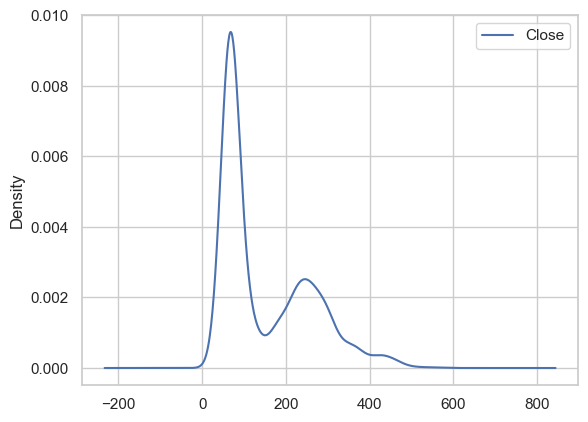

In [29]:
df1.plot(kind='kde')

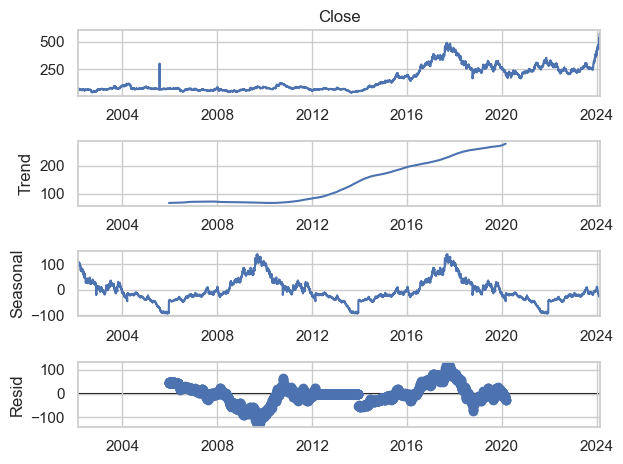

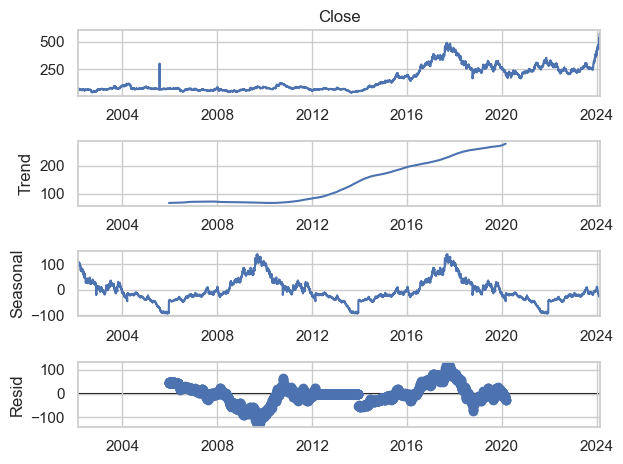

In [30]:
# Seasonal Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1.Close, period=2002-11-20)
result.plot()

In [31]:
# separate out a validation dataset
split_point = len(df1) - 1000
dataset, validation = df1[0:split_point], df1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=True)

print(dataset)
print("\n", validation)

Dataset 4467, Validation 1000
                 Close
Date                  
2002-02-20   54.466667
2002-02-21   53.444443
2002-02-22   55.177776
2002-02-25   57.500000
2002-02-26   62.977776
...                ...
2020-01-30  240.100006
2020-01-31  232.449997
2020-02-03  223.399994
2020-02-04  231.699997
2020-02-05  236.949997

[4467 rows x 1 columns]

                  Close
Date                  
2020-02-06  243.399994
2020-02-07  241.050003
2020-02-10  238.850006
2020-02-11  240.000000
2020-02-12  233.550003
...                ...
2024-02-13  501.649994
2024-02-14  543.299988
2024-02-15  575.000000
2024-02-16  565.700012
2024-02-19  554.700012

[1000 rows x 1 columns]


In [32]:
# Augmented Dickey-Fuller (ADF) test  here the ADF is import to check the dataset is stationary or not

from statsmodels.tsa.stattools import adfuller

# Now getting values of df dataset
values=df1.Close.values

# Now passing of the values to adfuller

result=adfuller(values)
result

(0.7690144334275218,
 0.9911191759892009,
 8,
 5458,
 {'1%': -3.431548676832535,
  '5%': -2.8620696953254154,
  '10%': -2.5670519557818583},
 35211.29653131534)

In [33]:
print('Augmneted Dickey_fuller Statistic: %f' % result[0])
print('p-value: %f'  %result[1])

Augmneted Dickey_fuller Statistic: 0.769014
p-value: 0.991119


In [34]:
# Checking for TimeSeries is Stationary

# printing the critical values at different alpha levels and the result of the test.

print('critical values at different levels:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))
if (result[1] > 0.025):
    print("The time series is non-stationary")

critical values at different levels:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is non-stationary


p value:0.0 , de_trended is Stationary


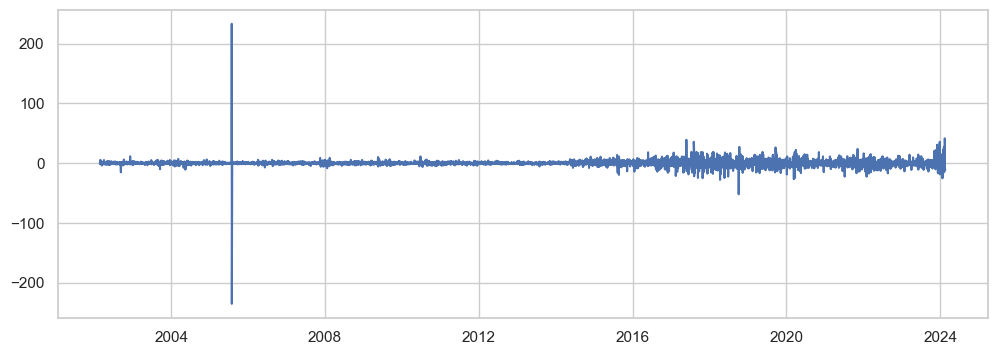

In [35]:
#De-trending with first order differencing

data1 = pd.DataFrame(df1["Close"].diff())  # Here, first order Differenation is finding or Lags Values of Close Column.
de_trended = data1.dropna()              # Here, detrending is done by dropping NAN Values
adf2 = adfuller(de_trended.values)[1]
print(f"p value:{adf2}", ", de_trended is Stationary" if adf2 <0.05 else ", df is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()

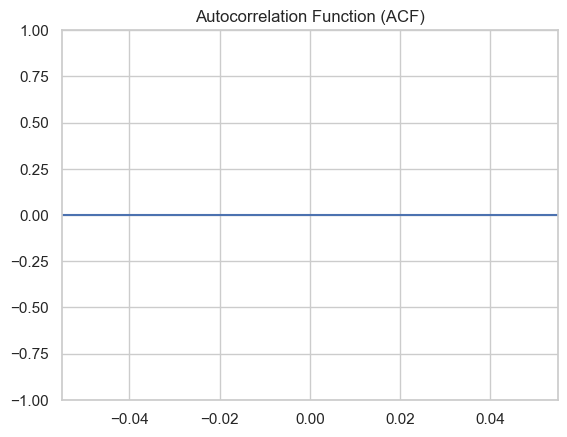

In [36]:
# Plot ACF and PACF to determine the order of AR and MA components
plot_acf(data1, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

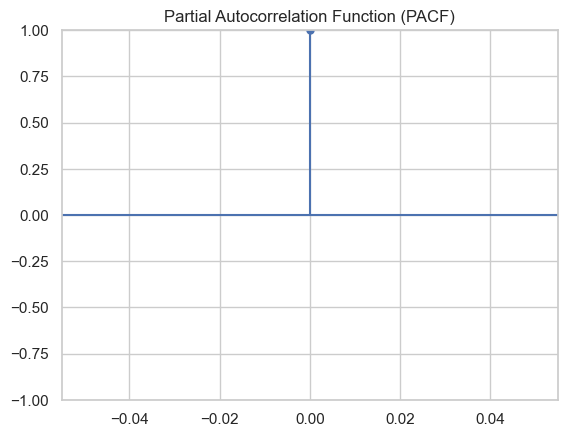

In [37]:
plot_pacf(data1, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [38]:
# For finding the optimal p-values and q-values we use library call pmdarima

import pmdarima as pm
auto_arima_model = pm.auto_arima(df1, seasonal=True, stepwise=True, suppress_warnings=True)
best_p, best_d, best_q = auto_arima_model.order
print(f"Best ARIMA order: ({best_p}, {best_d}, {best_q})")

#it is easy way to find out the p,q and d values

Best ARIMA order: (0, 1, 3)


C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



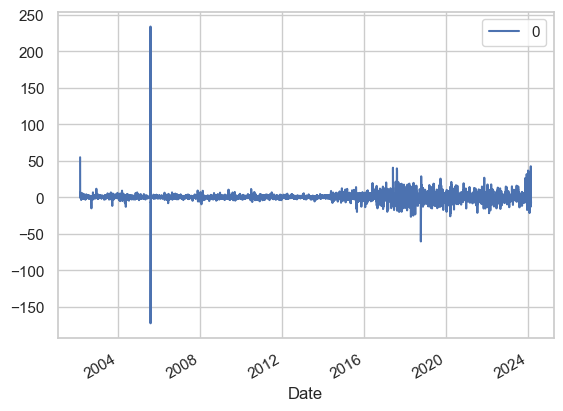

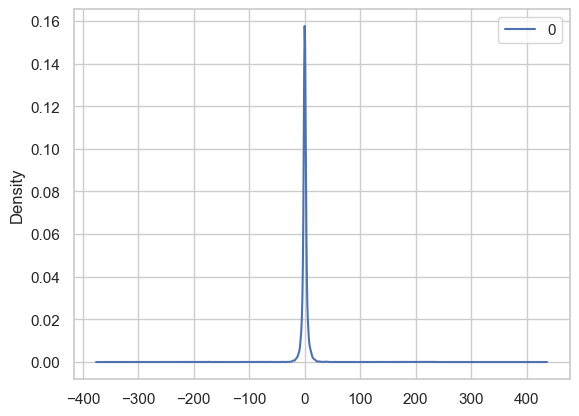

0
count  5467.000000
mean      0.143158
std       6.204628
min    -172.876805
25%      -1.429426
50%       0.003468
75%       1.610657
max     233.486956

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Model Fitting
model = ARIMA(df1['Close'], order=(0,1,3))
model_fit = model.fit()

# Residual Analysis
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

residuals.describe()

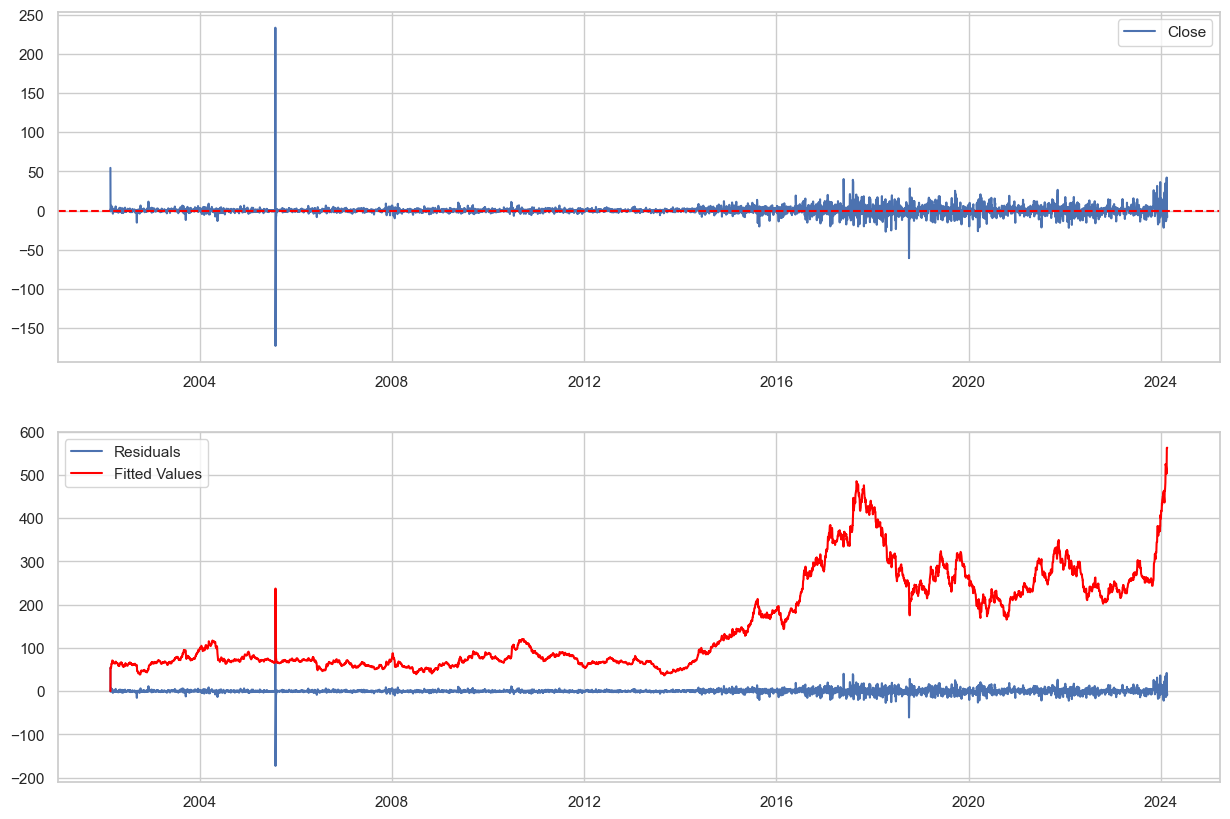

In [40]:
# Calculate residual plots
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(residuals, label='Close')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.legend(loc='best')

ax2.plot(residuals.index, residuals, label='Residuals')
ax2.plot(residuals.index, model_fit.fittedvalues, color='red', label='Fitted Values')
ax2.legend(loc='best')

C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



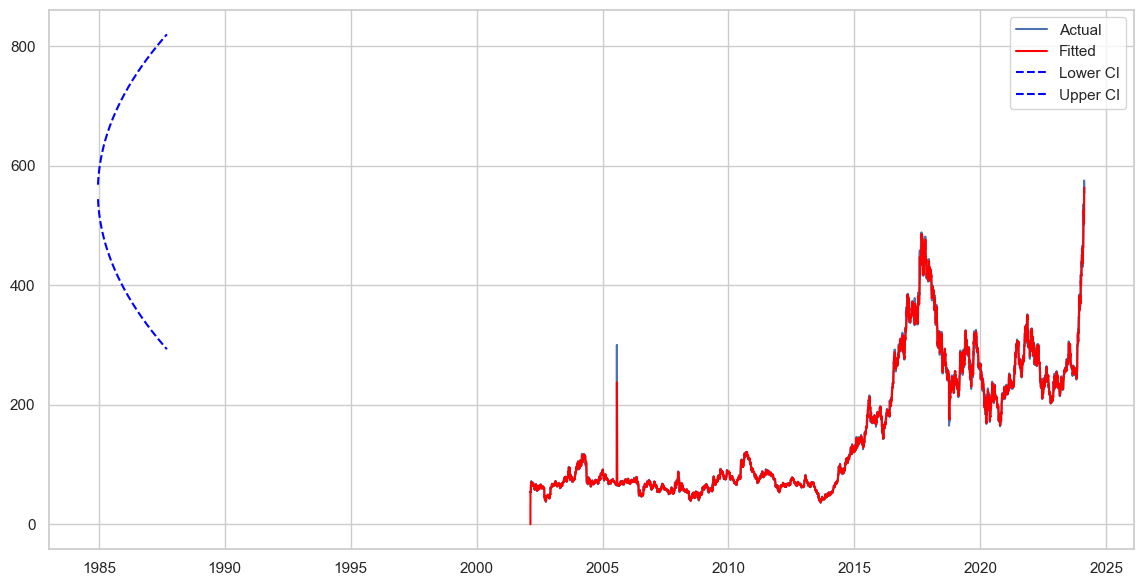

In [41]:
# Forecasting
forecast = model_fit.get_forecast(steps=1000)
forecast_ci = forecast.conf_int()

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(df['Close'], label='Actual')
ax.plot(model_fit.fittedvalues, color='red', label='Fitted')
ax.plot(forecast_ci.iloc[:, 0], color='blue', linestyle='--', label='Lower CI')
ax.plot(forecast_ci.iloc[:, 1], color='blue', linestyle='--', label='Upper CI')
ax.legend(loc='best')

plt.show()

In [42]:
# RMSE, MAPE
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

rmse = np.sqrt(mean_squared_error(df['Close'], model_fit.fittedvalues))
print('Root Mean Squared Error: ', rmse)

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
model_fit_scaled = scaler.fit_transform(model_fit.fittedvalues.values.reshape(-1, 1))

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_error(data_train_scaled, model_fit_scaled)
print('Mean Absolute Percentage Error: ', mape)

Root Mean Squared Error:  6.205711617214349
Mean Absolute Percentage Error:  0.026832526697278414


## 2. LSTM (Long Short Term Memory Cell) 

In [43]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extract the time series data
data = df1['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Define the sequence length (number of time steps to look back)
seq_length = 10

# Create sequences for training
sequences = create_sequences(data_scaled, seq_length)

# Split the data into training and testing sets
train_size = int(len(sequences) * 0.8)
train, test = sequences[:train_size], sequences[train_size:]

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Invert the scaling to get the actual stock prices
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
137/137 [==============================] - 3s 5ms/step - loss: 0.0018
Epoch 2/50
137/137 [==============================] - 1s 5ms/step - loss: 2.1560e-04
Epoch 3/50
137/137 [==============================] - 1s 5ms/step - loss: 2.0907e-04
Epoch 4/50
137/137 [==============================] - 1s 5ms/step - loss: 2.0683e-04
Epoch 5/50
137/137 [==============================] - 1s 5ms/step - loss: 2.0037e-04
Epoch 6/50
137/137 [==============================] - 1s 6ms/step - loss: 1.9141e-04
Epoch 7/50
137/137 [==============================] - 1s 6ms/step - loss: 2.0678e-04
Epoch 8/50
137/137 [==============================] - 1s 5ms/step - loss: 1.8412e-04
Epoch 9/50
137/137 [==============================] - 1s 5ms/step - loss: 1.8107e-04
Epoch 10/50
137/137 [==============================] - 1s 5ms/step - loss: 1.8631e-04
Epoch 11/50
137/137 [==============================] - 1s 5ms/step - loss: 1.7742e-04
Epoch 12/50
137/137 [==============================] - 1s 5ms/step 

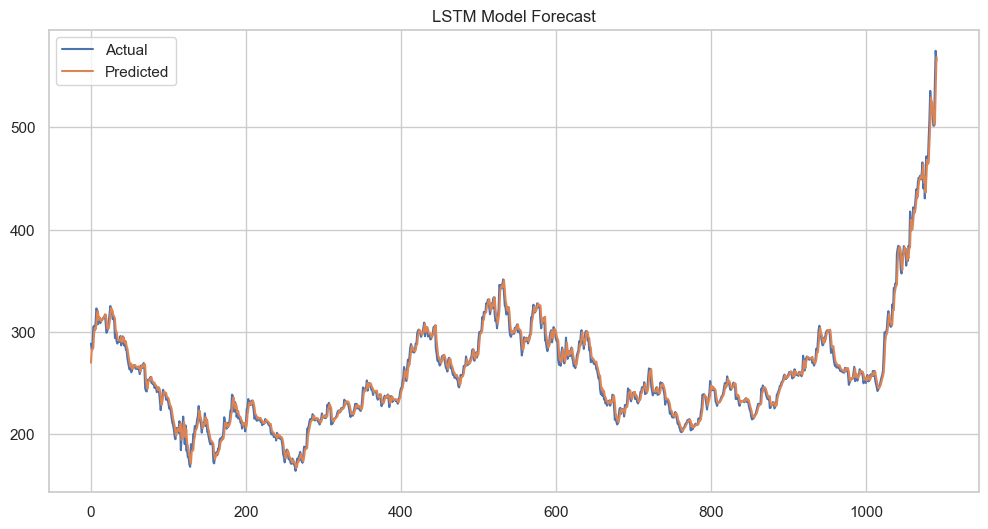

In [44]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()

In [45]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print("Root Mean Squared Error:", rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_inv - predictions_inv) / y_test_inv)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error: 6.869233672683595
Mean Absolute Percentage Error (MAPE): 1.8826313853966887


## 3. Linear Regression 

In [46]:
train = df1.head(2733)
test = df1.iloc[2734:]

In [47]:
# Importing Linear Regression

from sklearn.linear_model import LinearRegression

# Initial the Linear Regression

lm=LinearRegression() 

# Fitting of the X_train and Y_train Variables

lm.fit(train,test)

# Prediction of Linear Regression is Done

y_predict_train=lm.predict(train)
y_predict_train

array([[236.46374461],
       [236.80622608],
       [236.22549775],
       ...,
       [230.06084272],
       [230.42565699],
       [229.10785261]])

In [48]:
# Now, Prediction on the X_test

y_predict_test=lm.predict(test)
y_predict_test

array([[226.95617804],
       [227.64113863],
       [228.1734734 ],
       ...,
       [ 62.06652819],
       [ 65.18235558],
       [ 68.86774758]])

In [49]:
# Importing MSE
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse =sqrt(mean_squared_error(test,y_predict_test))
rmse


144.89329706922524

## 4. SARIMA 

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (0, 1, 3)  
seasonal_order = (0, 1, 3, 12)

model = SARIMAX(df1['Close'], order=order, seasonal_order=seasonal_order)
results = model.fit()

C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [51]:
forecast_steps = 1000  # Adjust the number of steps as needed
forecast = results.get_forecast(steps=forecast_steps)

C:\Users\SHYAM SASHANK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [52]:
# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_values

5467    556.423732
5468    556.653015
5469    557.063211
5470    557.301248
5471    557.466369
           ...    
6462    677.290724
6463    677.719139
6464    677.885683
6465    678.318604
6466    678.412721
Name: predicted_mean, Length: 1000, dtype: float64

In [53]:
# Get the index of the forecast values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq=df.index.freq)


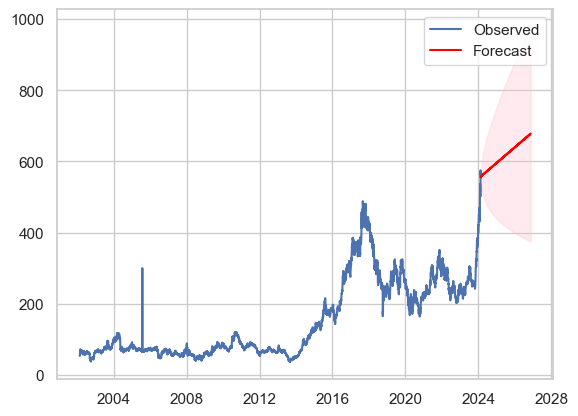

In [54]:
# Plotting Graph

plt.plot(df['Close'], label='Observed')
plt.plot(forecast_index[1:], forecast_values, label='Forecast', color='red')  # Use [1:] to exclude the initial point
plt.fill_between(forecast_index[1:], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

val=pd.read_csv('validation.csv')

mae = mean_absolute_error(val.Close, forecast_values)
mse = mean_squared_error(val.Close, forecast_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 360.43571307471126
Mean Squared Error (MSE): 132360.76740297515
Root Mean Squared Error (RMSE): 363.8141935150073


## 5. FbProphet 

In [56]:
from prophet import Prophet

columns_to_drop1 = ["Open", "High", "Low", "Adj Close", "Volume", "Year", "Month", "Day", "Weekday"]
df2 = oil_cleaned.drop(columns=columns_to_drop1)
df2

df2.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [57]:
# Create a Prophet object and fit it to the data
model = Prophet()
model.fit(df2)

20:28:33 - cmdstanpy - INFO - Chain [1] start processing
20:28:36 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
# Create a future dataframe
future = model.make_future_dataframe(periods=365)
future.tail()

ds
5827 2025-02-14
5828 2025-02-15
5829 2025-02-16
5830 2025-02-17
5831 2025-02-18

In [59]:
# Make predictions for the future dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
5827 2025-02-14  311.028883  269.052842  356.063516
5828 2025-02-15  280.381565  237.758545  323.544890
5829 2025-02-16  379.916187  334.833585  422.762187
5830 2025-02-17  309.482038  266.559676  352.043223
5831 2025-02-18  309.252858  267.518574  355.068655

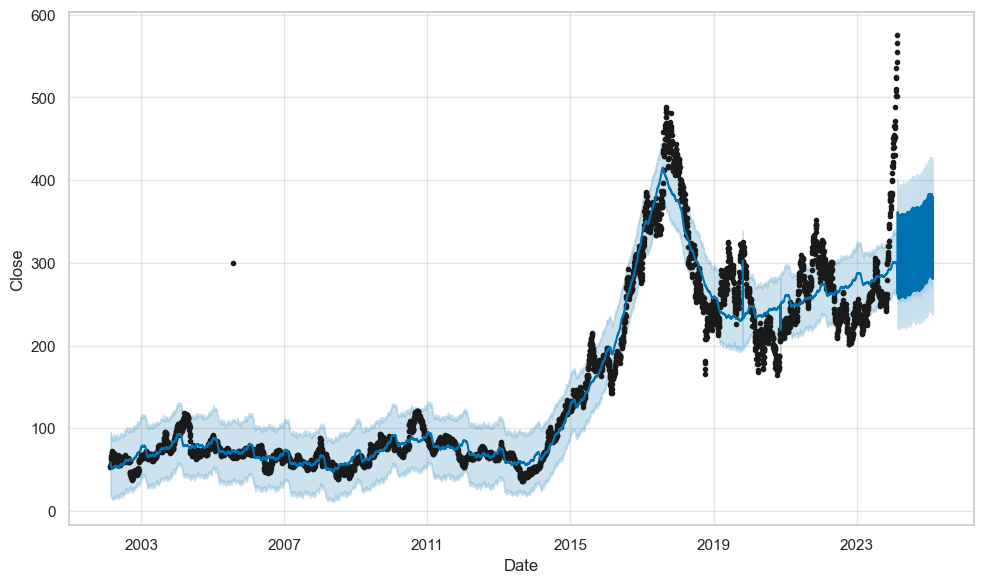

<Figure size 640x480 with 0 Axes>

In [60]:
# Visualize the predictions
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()
plt.savefig("my_plot.png")

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['Close'].values
y_pred = forecast['yhat'][-len(test):].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 78.8855853941885
MSE: 9927.841413646798
RMSE: 99.63855385164318
